In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
from math import cos
import time

# path for ffmpeg
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [37]:
def render_sphere(r, I, albedo=1):
    x, y = np.meshgrid(np.linspace(-r, r, 2*r), np.linspace(-r, r, 2*r))
    
    # partial derivative for x and y
    p = -x / np.sqrt(r**2 - (x**2 + y**2))
    q = -y / np.sqrt(r**2 - (x**2 + y**2))
    
    # calculate image brightness
    R = (albedo * (-I[0]*p - I[1]*q + I[2])) / np.sqrt(1 + p**2 + q**2)
    
    # mask out
    mask = ((r**2 - (x**2 + y**2) >= 0));
    R = R * mask
    E = np.maximum(R, np.zeros_like(R))
    E[np.isnan(E)] = 0
    
    # normalize
    E = E / np.max(E)
    
    return E

In [38]:
# radius
r = 50

# illumination
I = [[i, 0, 0.98] for i in np.arange(0, 1, 0.01)]
snapshots = [render_sphere(r, i) for i in I]

fig = plt.figure()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


<Figure size 432x288 with 0 Axes>

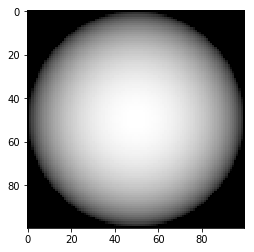

In [39]:
im = plt.imshow(snapshots[0], cmap='gray', animated=True)

In [40]:
# function for animation
def animate_func(i):
    im.set_array(snapshots[i])
    im.set_cmap('gray')
    return im,

In [41]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

anim = animation.FuncAnimation(fig,
                               animate_func,
                               interval=50,
                               blit=True)

In [43]:
rc('animation', html='html5')

In [44]:
anim